In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Plot distribution of median expression in the breast both breast control data


In [11]:
tissue = 'lung'
if tissue == 'lung':    
    path_to_tcga_file = '/nfs/data2/dysregnet_gtex/gtex/tcga_lung_controls.csv'
    path_to_gtex_file = '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_lung_filtered.csv'
elif tissue == 'breast':
    path_to_tcga_file = '/nfs/data2/dysregnet_gtex/gtex/tcga_breast_controls.csv'
    path_to_gtex_file = '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_breast_mammary_tissu_filtered.csv'

In [12]:
path_to_gtex_file

'/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_lung_filtered.csv'

In [13]:
#read in files 
tcga = pd.read_csv(path_to_tcga_file)
gtex = pd.read_csv(path_to_gtex_file)

In [14]:
#only keep genes that are in both datasets
gene_descriptions_gtex = set(gtex['Description'])
gene_descriptions_tcga = set(tcga['sample'])
intersect = gene_descriptions_gtex & gene_descriptions_tcga
matched_tcga_df = tcga[tcga['sample'].isin(intersect)]
matched_gtex_df = gtex[gtex['Description'].isin(intersect)]

In [18]:
matched_gtex_df.shape


(16954, 605)

In [15]:
#calculate median expression of genes accross both samples in both datasets
tcga_median_expression = matched_tcga_df.iloc[:, 1:].median(axis=1)  
gtex_median_expression = matched_gtex_df.iloc[:, 1:].median(axis=1)

In [16]:
#plot the median expressions
combined_medians = pd.DataFrame({
    "Expression": np.concatenate([tcga_median_expression, gtex_median_expression]),
    "Dataset": ["TCGA"] * len(tcga_median_expression) + ["GTEX"] * len(gtex_median_expression)
})

/tmp/ipykernel_4080047/3868567125.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_medians, x="Dataset", y="Expression", showfliers=False, palette=custom_palette)


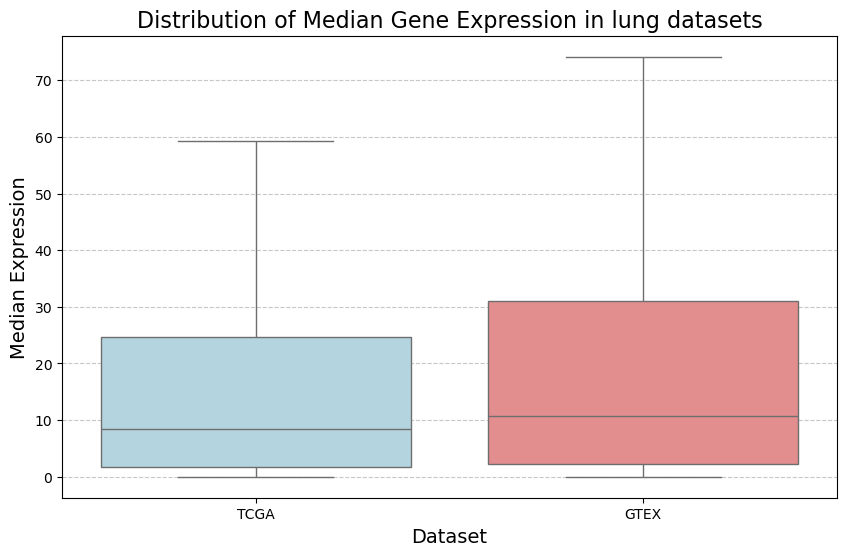

In [17]:
# Step 2: Create a box plot of the median expression values for both datasets
custom_palette = {
    'GTEX': 'lightcoral',    # Light red
    'TCGA': 'lightblue',    # Light blue
}
output_path_no_outlier = f'plots/{tissue}_medianExp_without_outliers.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_medians, x="Dataset", y="Expression", showfliers=False, palette=custom_palette)

# Step 3: Customize the plot
plt.title(f"Distribution of Median Gene Expression in {tissue} datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Median Expression", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(output_path_no_outlier, dpi=300)
plt.show()



/tmp/ipykernel_3443431/1947198099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_medians, x="Dataset", y="Expression", showfliers=True, palette="Set2")


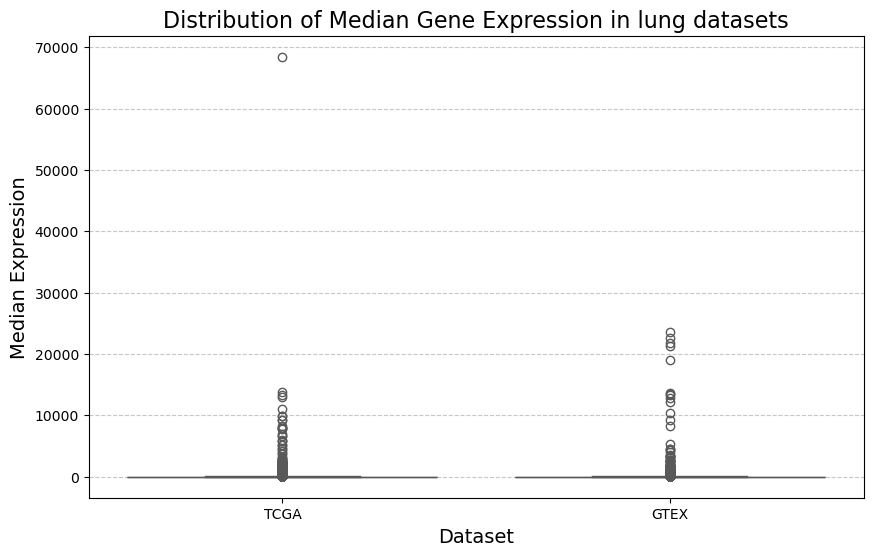

In [32]:
# Step 2: Create a box plot of the median expression values for both datasets
output_path_outlier = f'plots/{tissue}_medianExp_with_outliers.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_medians, x="Dataset", y="Expression", showfliers=True, palette="Set2")

# Step 3: Customize the plot
plt.title(f"Distribution of Median Gene Expression in {tissue} datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Median Expression", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig(output_path_outlier, dpi=300)
plt.show()


/tmp/ipykernel_1498759/3581232303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_medians, x="Dataset", y="Expression", showfliers=True, palette="Set2", log_scale=True)


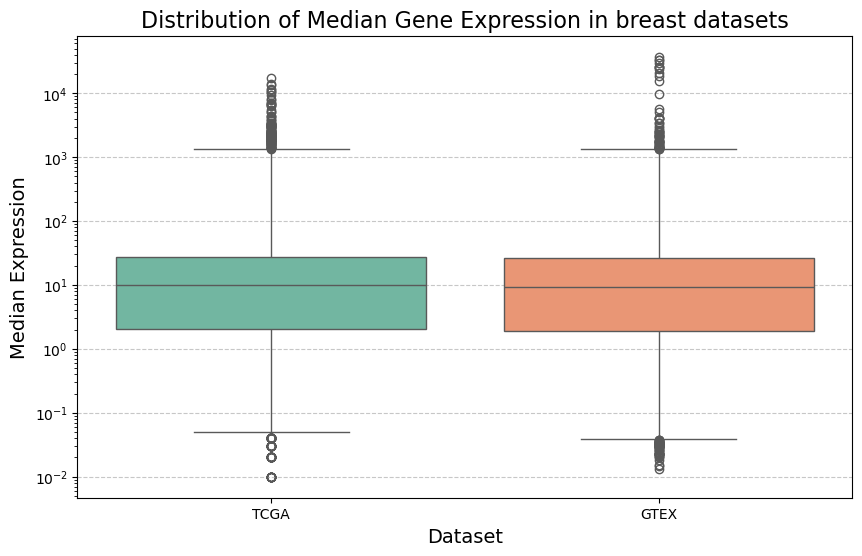

In [11]:
#log_scale
#output_path_outlier = f'plots/{tissue}_medianExp_with_outliers.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_medians, x="Dataset", y="Expression", showfliers=True, palette="Set2", log_scale=True)

# Step 3: Customize the plot
plt.title(f"Distribution of Median Gene Expression in {tissue} datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Median Expression", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig(output_path_outlier, dpi=300)
plt.show()

/tmp/ipykernel_3443431/533220256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_medians, x="Dataset", y="Expression", palette="Set2", log_scale=True)


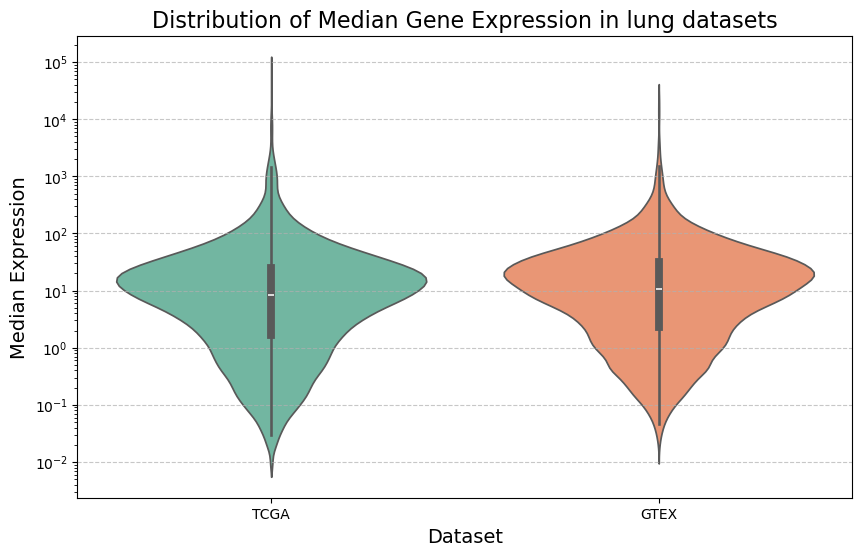

In [ ]:
# Violinplot
output_path_outlier = f'plots/{tissue}_medianExp_with_outliers.png'
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_medians, x="Dataset", y="Expression", palette="Set2", log_scale=True)

# Step 3: Customize the plot
plt.title(f"Distribution of Median Gene Expression in {tissue} datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Median Expression", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig(output_path_outlier, dpi=300)
plt.show()